<a href="https://colab.research.google.com/github/tamayodb/CCADMACL_EXAM_COM222ML/blob/main/Midterm_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CCADMACL (Midterm Exam)

## Import the libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from mpl_toolkits.mplot3d import Axes3D

from collections import Counter

## Load the datasets

In [2]:
face_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/face.csv?raw=true")
chrome_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/chrome.csv?raw=true")
lines2_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/lines2.csv?raw=true")
supernova_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/supernova.csv?raw=true")
network_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/network.csv?raw=true")
spirals_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/7a460f9db1109ede93e371e663bac0615057de89/dataset/spirals.csv?raw=true")
densedisk_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/densedisk.csv?raw=true")
rings_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/rings.csv?raw=true")
chainlink_df = pd.read_csv("https://github.com/robitussin/CCADMACL_EXAM/blob/b6a2e277c58bd723f9c4c1a2873aac30b87f778b/dataset/chainlink.csv?raw=true")

## Plot the datasets

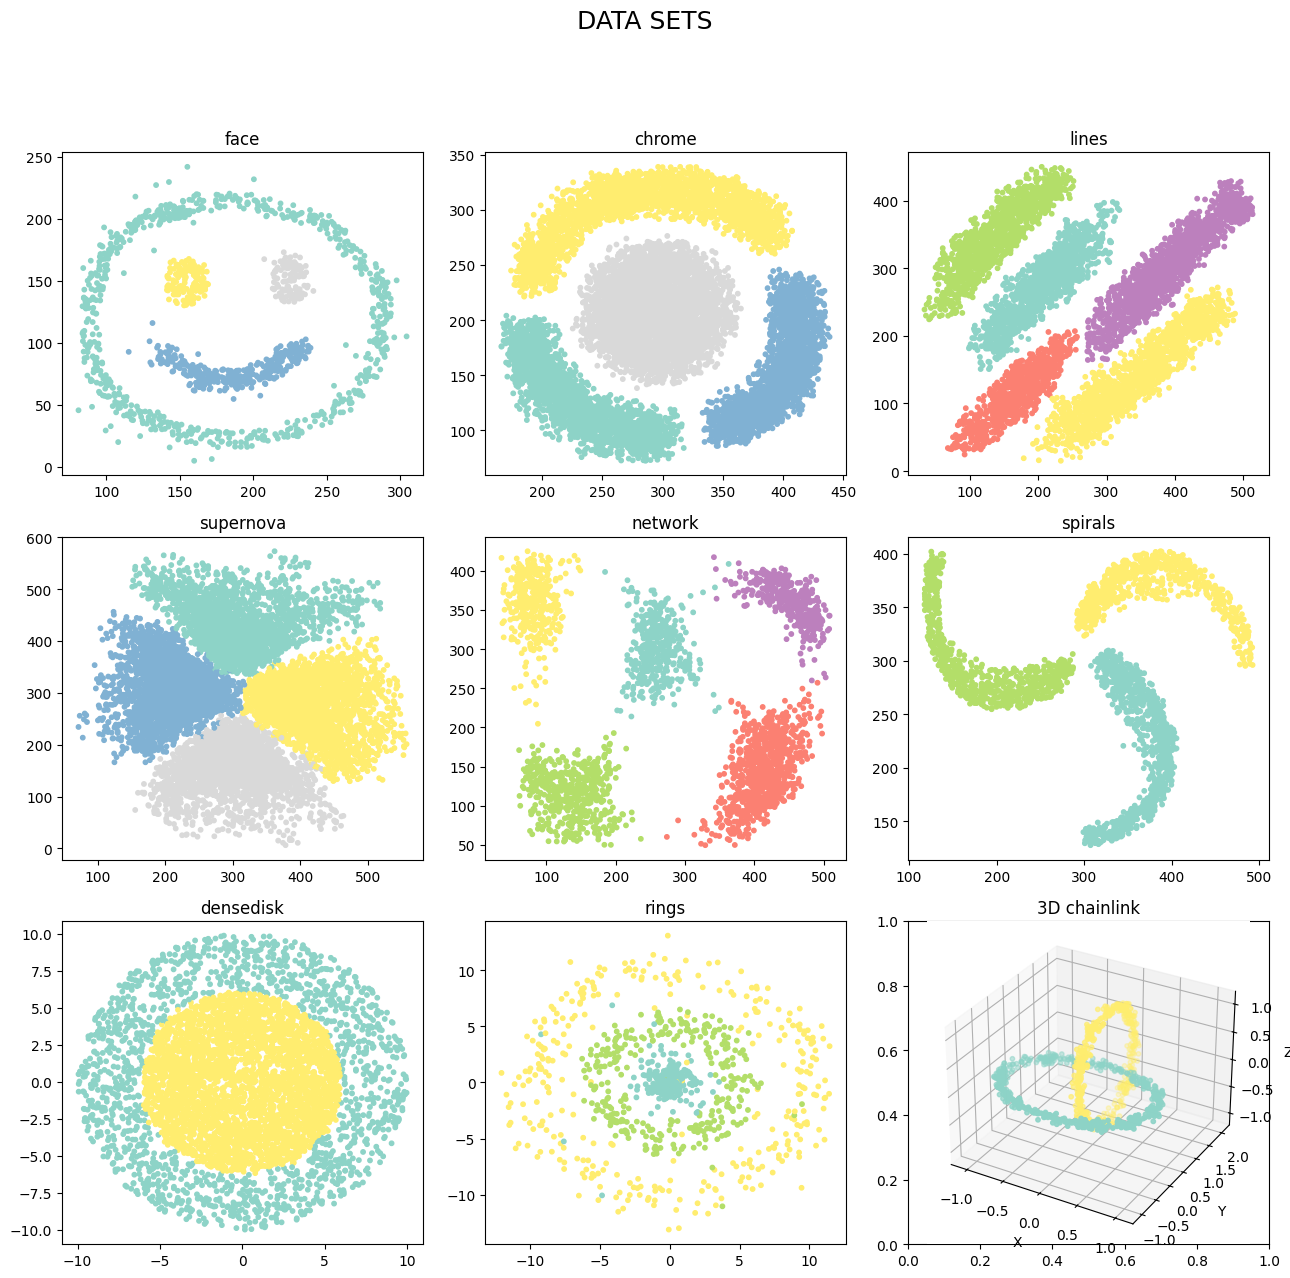

In [3]:
fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(13, 13))
fig.suptitle('DATA SETS\n', size=18)

# Plot the 2D scatterplots
axes[0, 0].scatter(face_df['x'], face_df['y'], c=face_df['color'], s=10, cmap="Set3")
axes[0, 0].set_title("face")

axes[0, 1].scatter(chrome_df['x'], chrome_df['y'], c=chrome_df['color'], s=10, cmap="Set3")
axes[0, 1].set_title("chrome")

axes[0, 2].scatter(lines2_df['x'], lines2_df['y'], c=lines2_df['color'], s=10, cmap="Set3")
axes[0, 2].set_title("lines")

axes[1, 0].scatter(supernova_df['x'], supernova_df['y'], c=supernova_df['color'], s=10, cmap="Set3")
axes[1, 0].set_title("supernova")

axes[1, 1].scatter(network_df['x'], network_df['y'], c=network_df['color'], s=10, cmap="Set3")
axes[1, 1].set_title("network")

axes[1, 2].scatter(spirals_df['x'], spirals_df['y'], c=spirals_df['color'], s=10, cmap="Set3")
axes[1, 2].set_title("spirals")

axes[2, 0].scatter(densedisk_df['x'], densedisk_df['y'], c=densedisk_df['color'], s=10, cmap="Set3")
axes[2, 0].set_title("densedisk")

axes[2, 1].scatter(rings_df['x'], rings_df['y'], c=rings_df['color'], s=10, cmap="Set3")
axes[2, 1].set_title("rings")

# Add a 3D plot
ax3d = fig.add_subplot(3, 3, 9, projection='3d')
ax3d.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], cmap="Set3", s=10)
ax3d.set_title("3D chainlink")
ax3d.set_xlabel("X")
ax3d.set_ylabel("Y")
ax3d.set_zlabel("Z")

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])

## A. Use K-means to cluster each dataset

1. Create each copy of the dataset for k-means

In [4]:
face_kmeans_df = face_df.copy()
chrome_kmeans_df = chrome_df.copy()
lines2_kmeans_df = lines2_df.copy()
supernova_kmeans_df = supernova_df.copy()
network_kmeans_df = network_df.copy()
spirals_kmeans_df = spirals_df.copy()
densedisk_kmeans_df = densedisk_df.copy()
rings_kmeans_df = rings_df.copy()
chainlink_kmeans_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [5]:
face_kmeans_df = face_kmeans_df.drop(columns=['color'])
chrome_kmeans_df = chrome_kmeans_df.drop(columns=['color'])
lines2_kmeans_df = lines2_kmeans_df.drop(columns=['color'])
supernova_kmeans_df = supernova_kmeans_df.drop(columns=['color'])
network_kmeans_df = network_kmeans_df.drop(columns=['color'])
spirals_kmeans_df = spirals_kmeans_df.drop(columns=['color'])
densedisk_kmeans_df = densedisk_kmeans_df.drop(columns=['color'])
rings_kmeans_df = rings_kmeans_df.drop(columns=['color'])
chainlink_kmeans_df = chainlink_kmeans_df.drop(columns=['color'])

3. Train a K-means model for each dataset.

In [6]:
optimal_k_values = {
    'face': 4 ,
    'chrome': 4,
    'lines2': 5,
    'supernova': 4,
    'network': 5,
    'spirals': 3,
    'densedisk': 2,
    'rings': 3,
    'chainlink': 2
}

datasets = {
    'face': face_kmeans_df,
    'chrome': chrome_kmeans_df,
    'lines2': lines2_kmeans_df,
    'supernova': supernova_kmeans_df,
    'network': network_kmeans_df,
    'spirals': spirals_kmeans_df,
    'densedisk': densedisk_kmeans_df,
    'rings': rings_kmeans_df,
    'chainlink': chainlink_kmeans_df
}

kmeans_models = {}

for dataset_name, df in datasets.items():
  optimal_k = optimal_k_values[dataset_name]
  kmeans = KMeans(n_clusters=optimal_k, random_state=0)
  kmeans.fit(df)
  kmeans_models[dataset_name] = kmeans
  print(f"K-means model trained for {dataset_name} with k={optimal_k}")

K-means model trained for face with k=4
K-means model trained for chrome with k=4
K-means model trained for lines2 with k=5
K-means model trained for supernova with k=4
K-means model trained for network with k=5
K-means model trained for spirals with k=3
K-means model trained for densedisk with k=2
K-means model trained for rings with k=3
K-means model trained for chainlink with k=2


4. Add a "Cluster" column for each data set

In [7]:
for dataset_name, df in datasets.items():
    kmeans = kmeans_models[dataset_name]
    clusters = kmeans.predict(df)
    df['Cluster'] = clusters
    print(f"Cluster column added to {dataset_name}")

Cluster column added to face
Cluster column added to chrome
Cluster column added to lines2
Cluster column added to supernova
Cluster column added to network
Cluster column added to spirals
Cluster column added to densedisk
Cluster column added to rings
Cluster column added to chainlink


5. Plot the Correct cluster and the K-means cluster

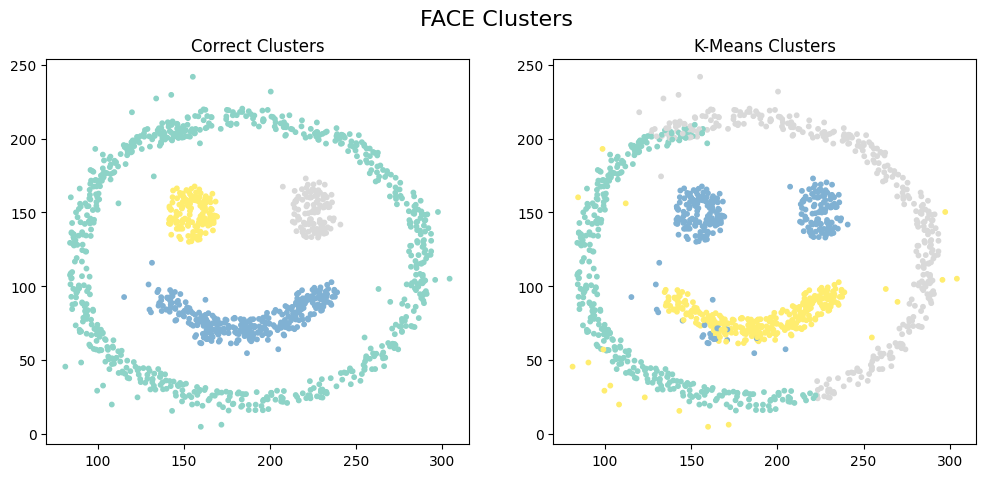

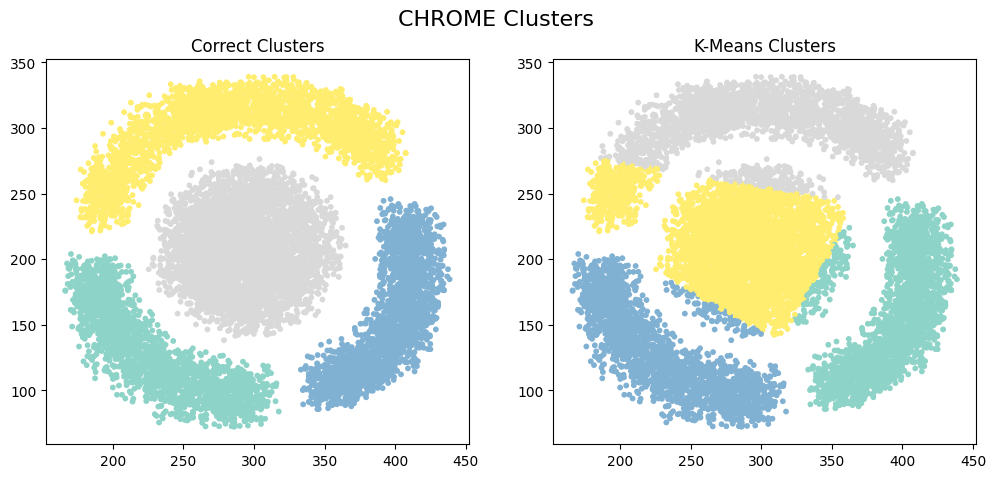

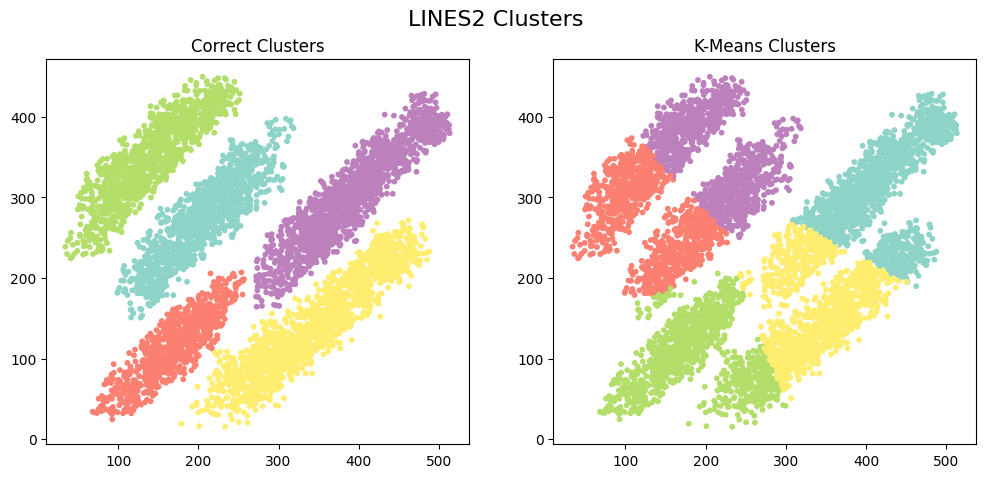

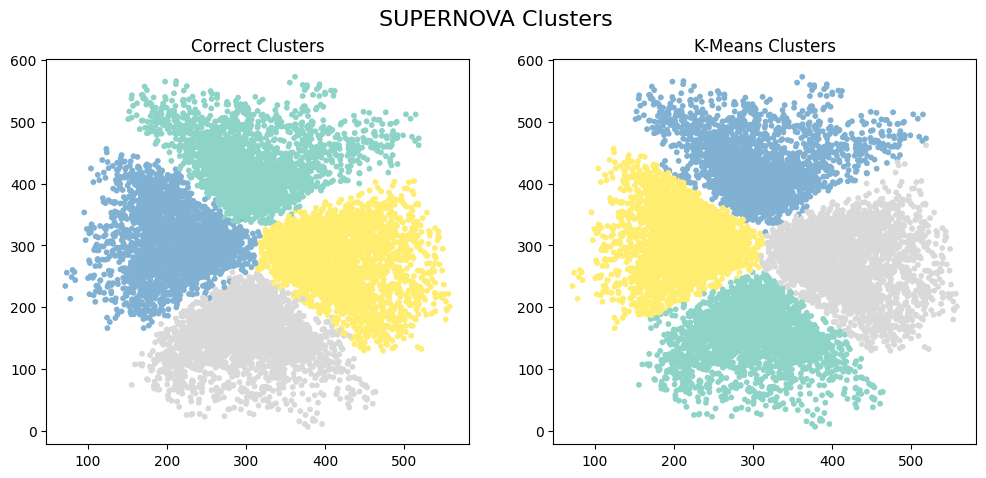

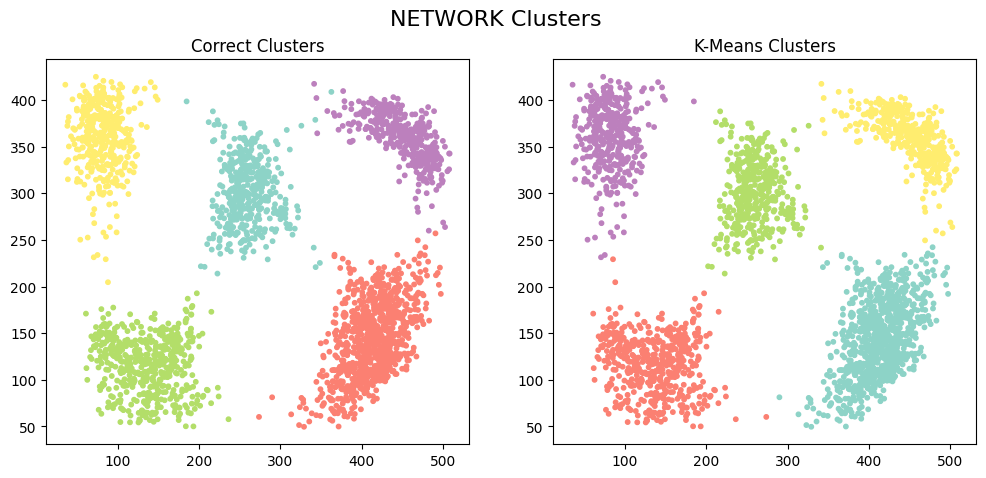

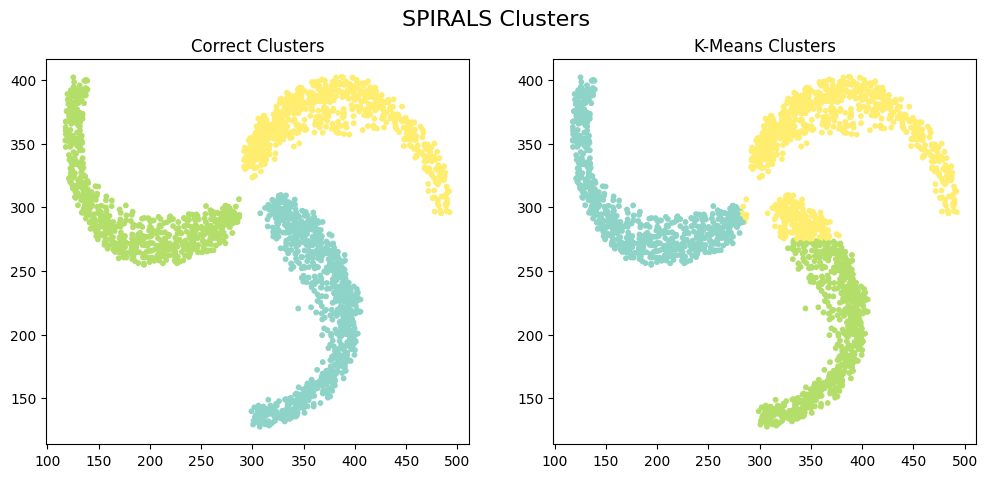

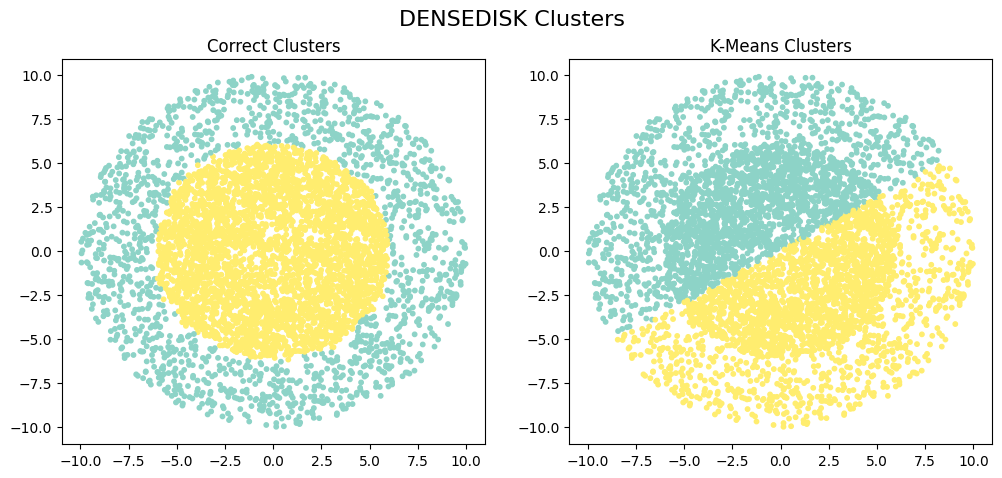

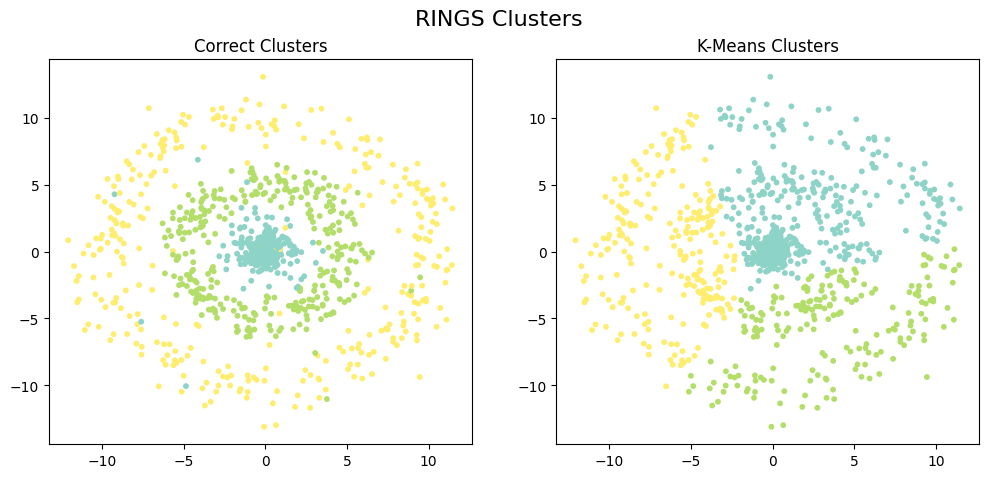

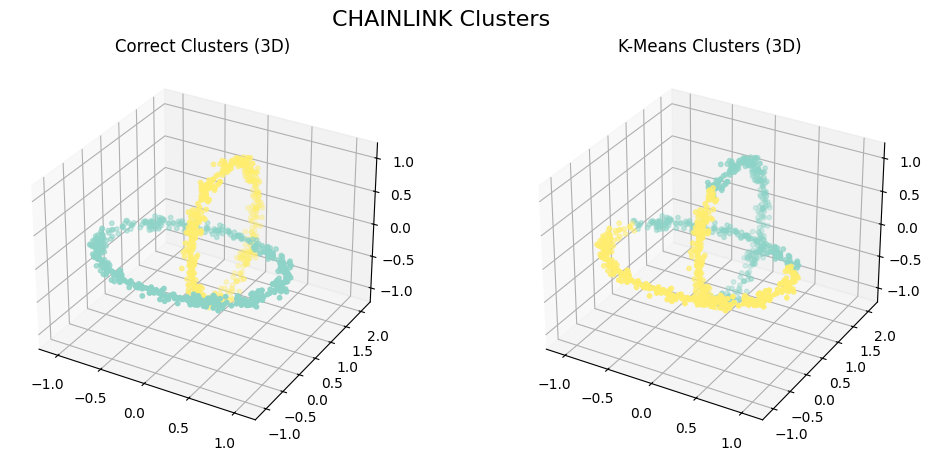

In [8]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

for dataset_name, df in datasets.items():
    original_df = eval(f"{dataset_name}_df")

    # Create subplots: 2 for 2D, and 1 for 3D in the case of chainlink
    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f'{dataset_name.upper()} Clusters', size=16)

    if dataset_name == 'chainlink':
        # Create a 3D axis for the chainlink dataset
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(original_df['x'], original_df['y'], original_df['z'], c=original_df['color'], s=10, cmap='Set3')
        ax.set_title("Correct Clusters (3D)")

        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(df['x'], df['y'], df['z'], c=df['Cluster'], s=10, cmap='Set3')
        ax.set_title("K-Means Clusters (3D)")

    else:
        # Regular 2D scatter plot for other datasets
        axes = fig.subplots(1, 2)
        axes[0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap='Set3')
        axes[0].set_title("Correct Clusters")
        axes[1].scatter(df['x'], df['y'], c=df['Cluster'], s=10, cmap='Set3')
        axes[1].set_title("K-Means Clusters")

    plt.show()


## B. Use Agglomerative Clustering to cluster each dataset

1. Create each copy of the dataset for Agglomerative Clustering

In [9]:
face_agg_df = face_df.copy()
chrome_agg_df = chrome_df.copy()
lines2_agg_df = lines2_df.copy()
supernova_agg_df = supernova_df.copy()
network_agg_df = network_df.copy()
spirals_agg_df = spirals_df.copy()
densedisk_agg_df = densedisk_df.copy()
rings_agg_df = rings_df.copy()
chainlink_agg_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [10]:
face_agg_df = face_agg_df.drop(columns=['color'])
chrome_agg_df = chrome_agg_df.drop(columns=['color'])
lines2_agg_df = lines2_agg_df.drop(columns=['color'])
supernova_agg_df = supernova_agg_df.drop(columns=['color'])
network_agg_df = network_agg_df.drop(columns=['color'])
spirals_agg_df = spirals_agg_df.drop(columns=['color'])
densedisk_agg_df = densedisk_agg_df.drop(columns=['color'])
rings_agg_df = rings_agg_df.drop(columns=['color'])
chainlink_agg_df = chainlink_agg_df.drop(columns=['color'])

3. Train a Agglomerative Clustering model for each dataset.

In [11]:
optimal_k_values = {
    'face': 4,
    'chrome': 4,
    'lines2': 5,
    'supernova': 4,
    'network': 5,
    'spirals': 3,
    'densedisk': 2,
    'rings': 3,
    'chainlink': 2
}

datasets = {
    'face': face_agg_df,
    'chrome': chrome_agg_df,
    'lines2': lines2_agg_df,
    'supernova': supernova_agg_df,
    'network': network_agg_df,
    'spirals': spirals_agg_df,
    'densedisk': densedisk_agg_df,
    'rings': rings_agg_df,
    'chainlink': chainlink_agg_df
}

agg_models = {}

for dataset_name, df in datasets.items():
  optimal_k = optimal_k_values[dataset_name]
  agg = AgglomerativeClustering(n_clusters=optimal_k)
  agg.fit(df)
  agg_models[dataset_name] = agg
  print(f"Agglomerative Clustering model trained for {dataset_name} with k={optimal_k}")

Agglomerative Clustering model trained for face with k=4
Agglomerative Clustering model trained for chrome with k=4
Agglomerative Clustering model trained for lines2 with k=5
Agglomerative Clustering model trained for supernova with k=4
Agglomerative Clustering model trained for network with k=5
Agglomerative Clustering model trained for spirals with k=3
Agglomerative Clustering model trained for densedisk with k=2
Agglomerative Clustering model trained for rings with k=3
Agglomerative Clustering model trained for chainlink with k=2


4. Add a "Cluster" column for each data set

In [12]:
for dataset_name, df in datasets.items():
    agg = agg_models[dataset_name]
    clusters = agg.fit_predict(df)
    df['Cluster'] = clusters
    print(f"Cluster column added to {dataset_name}")

Cluster column added to face
Cluster column added to chrome
Cluster column added to lines2
Cluster column added to supernova
Cluster column added to network
Cluster column added to spirals
Cluster column added to densedisk
Cluster column added to rings
Cluster column added to chainlink


5. Plot the Correct cluster and the Agglomerative cluster

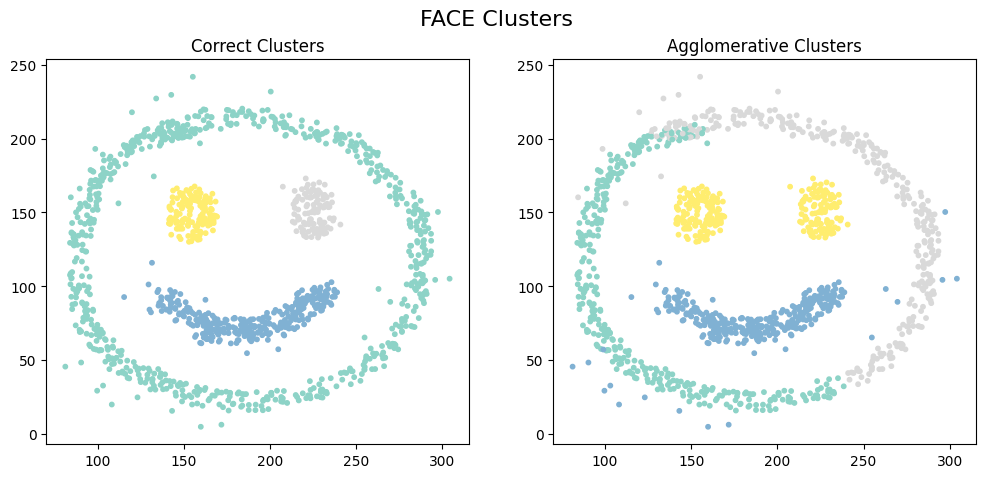

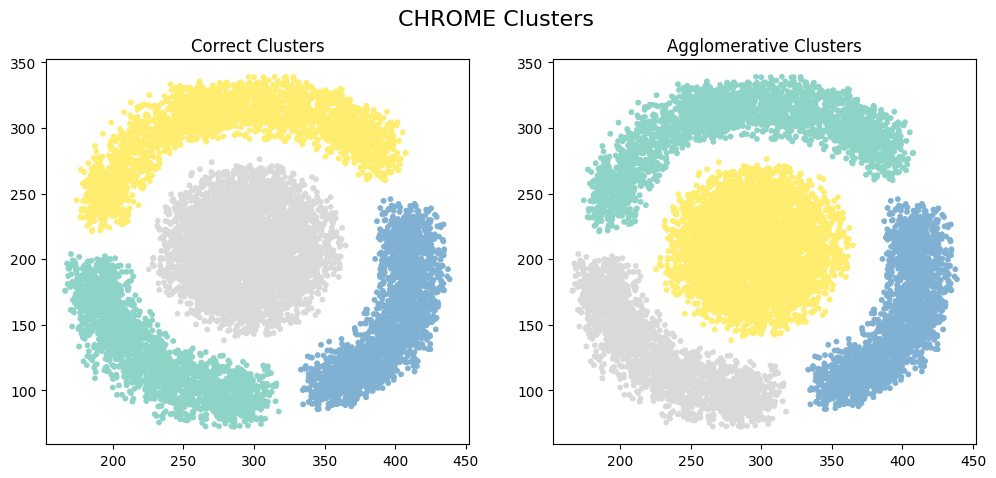

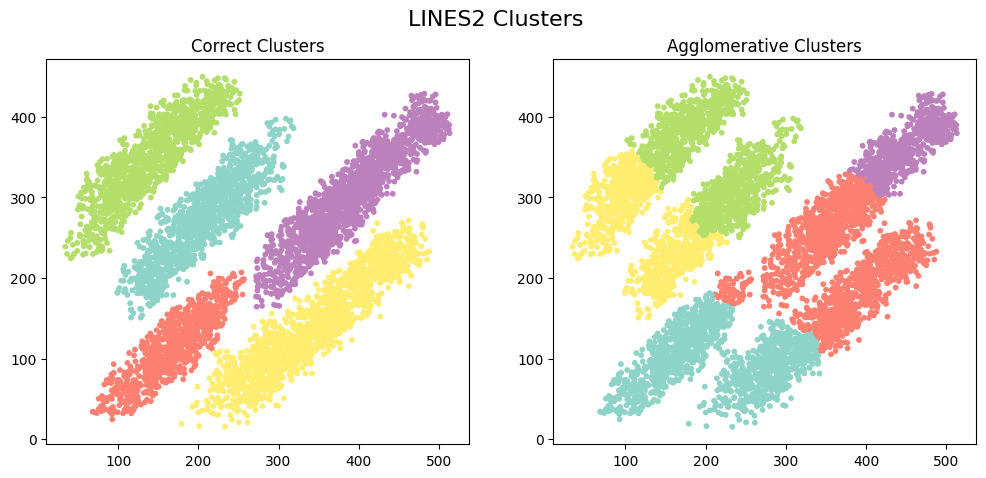

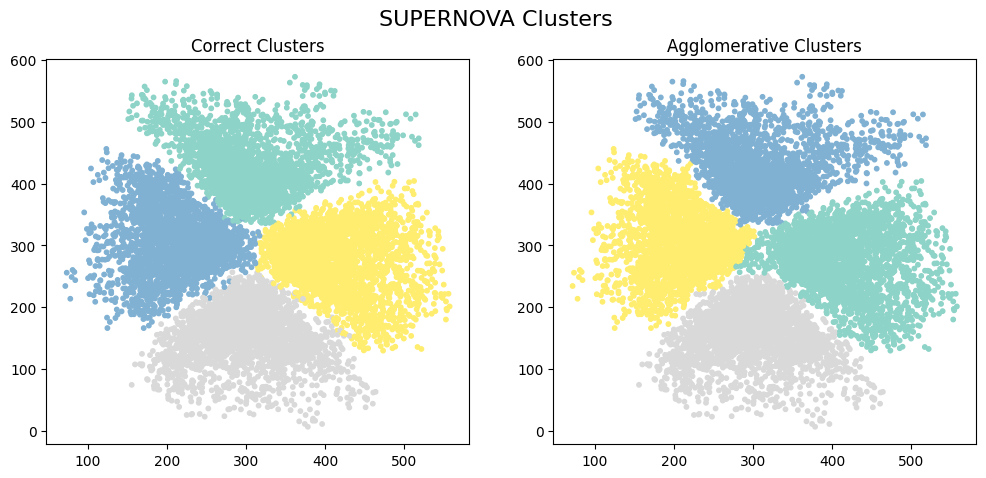

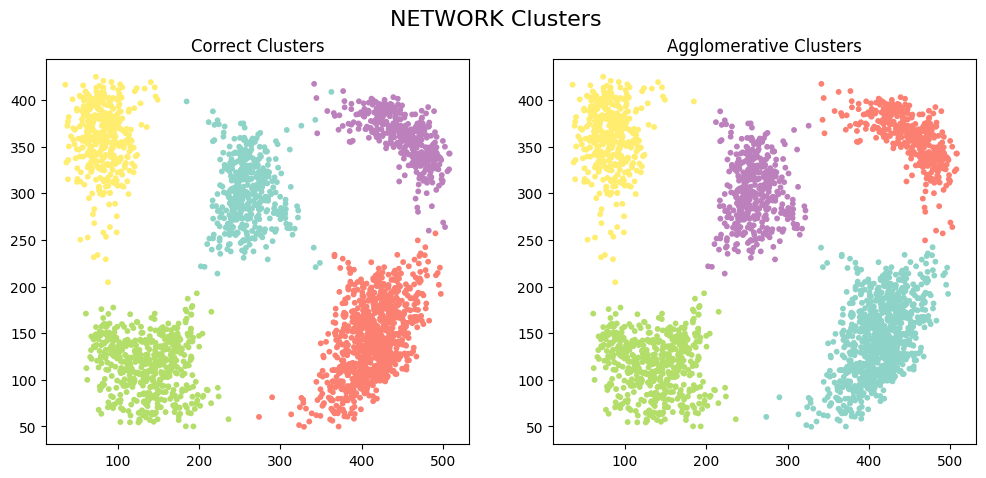

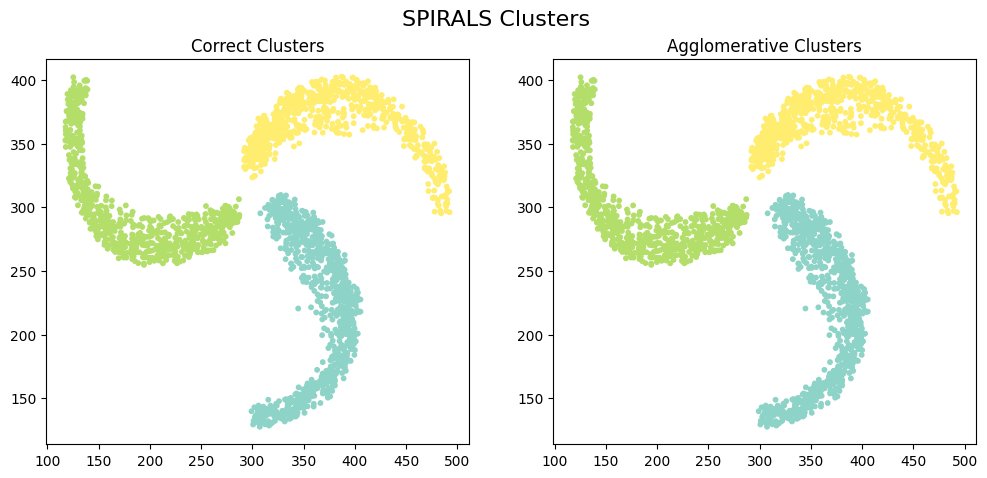

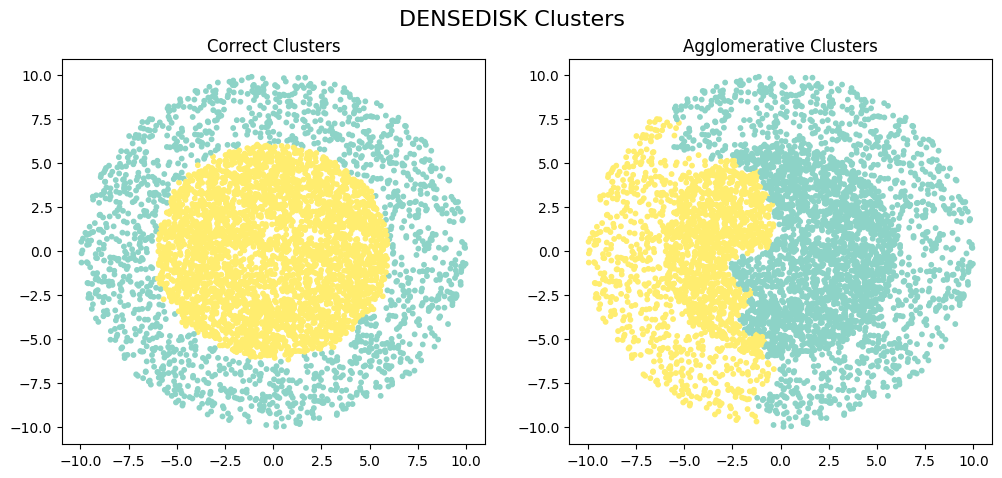

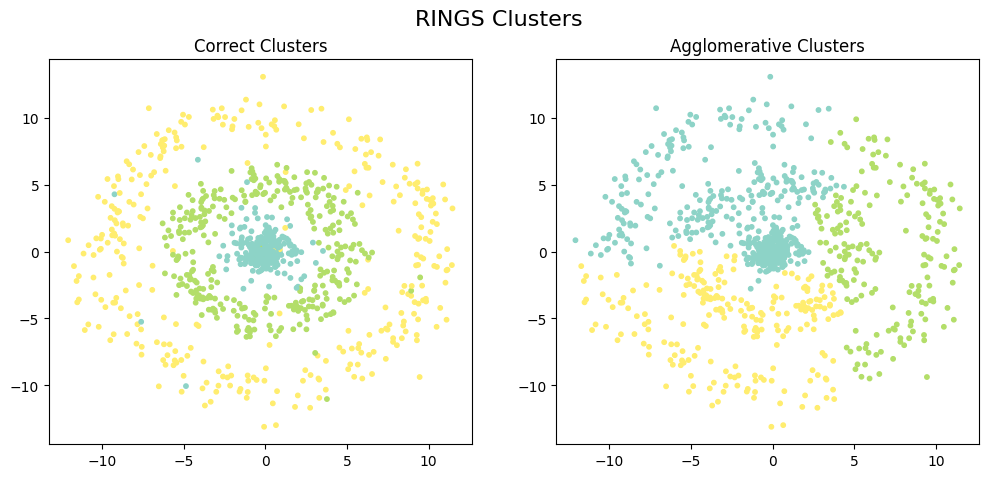

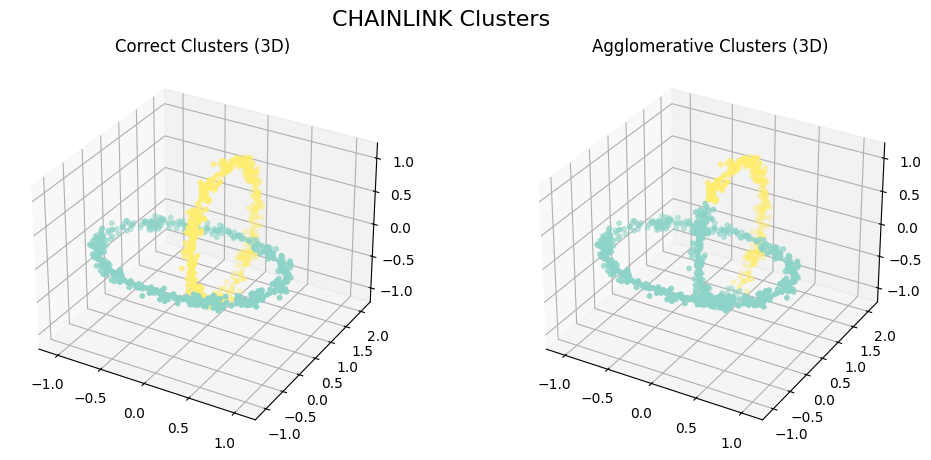

In [13]:
for dataset_name, df in datasets.items():
    original_df = eval(f"{dataset_name}_df")

    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f'{dataset_name.upper()} Clusters', size=16)

    if dataset_name == 'chainlink':
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(original_df['x'], original_df['y'], original_df['z'], c=original_df['color'], s=10, cmap='Set3')
        ax.set_title("Correct Clusters (3D)")

        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(df['x'], df['y'], df['z'], c=df['Cluster'], s=10, cmap='Set3')
        ax.set_title("Agglomerative Clusters (3D)")

    else:
        axes = fig.subplots(1, 2)
        axes[0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap='Set3')
        axes[0].set_title("Correct Clusters")
        axes[1].scatter(df['x'], df['y'], c=df['Cluster'], s=10, cmap='Set3')
        axes[1].set_title("Agglomerative Clusters")

    plt.show()

## C. Use DBSCAN to cluster each dataset

1. Create each copy of the dataset for DBSCAN

In [30]:
face_dbscan_df = face_df.copy()
chrome_dbscan_df = chrome_df.copy()
lines2_dbscan_df = lines2_df.copy()
supernova_dbscan_df = supernova_df.copy()
network_dbscan_df = network_df.copy()
spirals_dbscan_df = spirals_df.copy()
densedisk_dbscan_df = densedisk_df.copy()
rings_dbscan_df = rings_df.copy()
chainlink_dbscan_df = chainlink_df.copy()

2. Drop the "color" column on all datasets

In [31]:
face_dbscan_df = face_dbscan_df.drop(columns=['color'])
chrome_dbscan_df = chrome_dbscan_df.drop(columns=['color'])
lines2_dbscan_df = lines2_dbscan_df.drop(columns=['color'])
supernova_dbscan_df = supernova_dbscan_df.drop(columns=['color'])
network_dbscan_df = network_dbscan_df.drop(columns=['color'])
spirals_dbscan_df = spirals_dbscan_df.drop(columns=['color'])
densedisk_dbscan_df = densedisk_dbscan_df.drop(columns=['color'])
rings_dbscan_df = rings_dbscan_df.drop(columns=['color'])
chainlink_dbscan_df = chainlink_dbscan_df.drop(columns=['color'])

3. Train a DBSCAN Clustering model for each dataset.

In [40]:
dbscan_params = {
    'face': {'eps': 9, 'min_samples': 3},
    'chrome': {'eps': 13, 'min_samples': 45},
    'lines2': {'eps': 15.5, 'min_samples': 14},
    'supernova': {'eps': 15.5, 'min_samples': 10},
    'network': {'eps': 8, 'min_samples': 22},
    'spirals': {'eps': 5.7, 'min_samples': 4},
    'densedisk': {'eps': 0.40162233, 'min_samples': 12},
    'rings': {'eps': 0.1, 'min_samples': 7},
    'chainlink': {'eps': 0.5, 'min_samples': 5}
}

datasets = {
    'face': face_dbscan_df,
    'chrome': chrome_dbscan_df,
    'lines2': lines2_dbscan_df,
    'supernova': supernova_dbscan_df,
    'network': network_dbscan_df,
    'spirals': spirals_dbscan_df,
    'densedisk': densedisk_dbscan_df,
    'rings': rings_dbscan_df,
    'chainlink': chainlink_dbscan_df
}

dbscan_models = {}

for dataset_name, df in datasets.items():
  params = dbscan_params[dataset_name]
  dbscan = DBSCAN(eps=params['eps'], min_samples=params['min_samples'])
  dbscan.fit(df)
  dbscan_models[dataset_name] = dbscan
  print(f"DBSCAN model trained for {dataset_name} with eps={params['eps']}, min_samples={params['min_samples']}")

DBSCAN model trained for face with eps=9, min_samples=3
DBSCAN model trained for chrome with eps=13, min_samples=45
DBSCAN model trained for lines2 with eps=15.5, min_samples=14
DBSCAN model trained for supernova with eps=15.5, min_samples=10
DBSCAN model trained for network with eps=8, min_samples=22
DBSCAN model trained for spirals with eps=5.7, min_samples=4
DBSCAN model trained for densedisk with eps=0.40162233, min_samples=12
DBSCAN model trained for rings with eps=0.1, min_samples=7
DBSCAN model trained for chainlink with eps=0.5, min_samples=5


4. Add a "Cluster" column for each data set

In [41]:
for dataset_name, df in datasets.items():
    dbscan = dbscan_models[dataset_name]
    clusters = dbscan.fit_predict(df)
    df['Cluster'] = clusters
    print(f"Cluster column added to {dataset_name}")


Cluster column added to face
Cluster column added to chrome
Cluster column added to lines2
Cluster column added to supernova
Cluster column added to network
Cluster column added to spirals
Cluster column added to densedisk
Cluster column added to rings
Cluster column added to chainlink


5. Plot the Correct cluster and the DBSCAN cluster

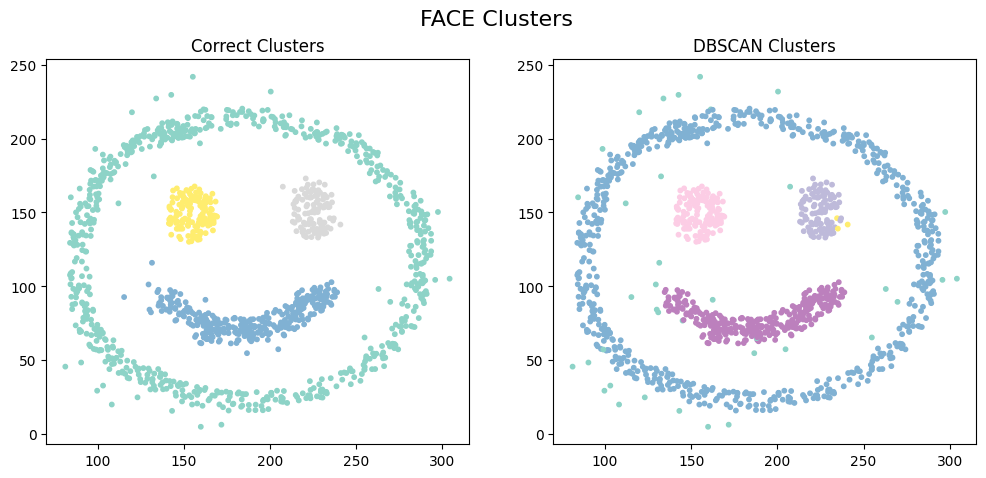

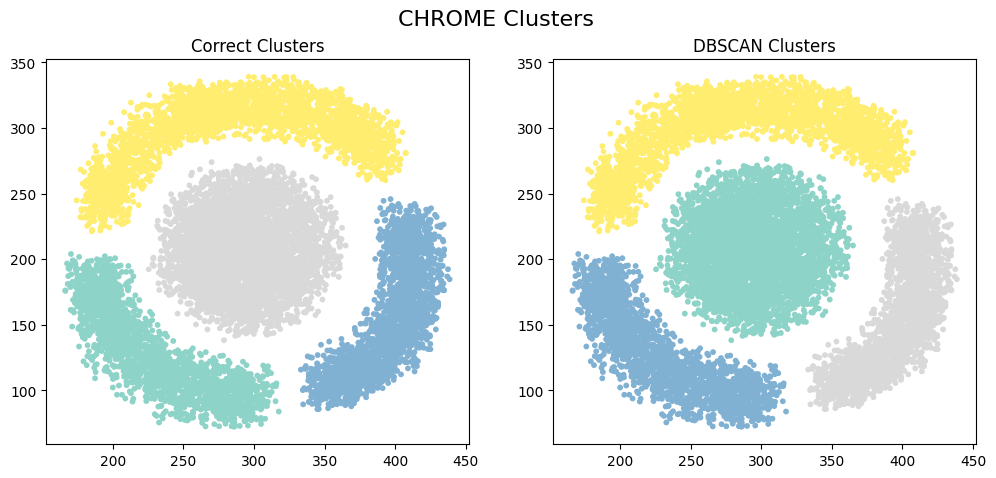

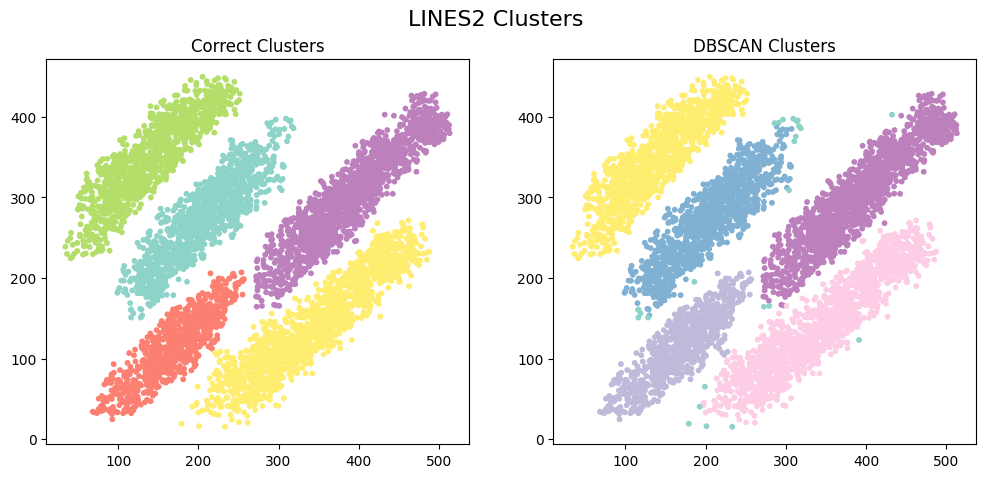

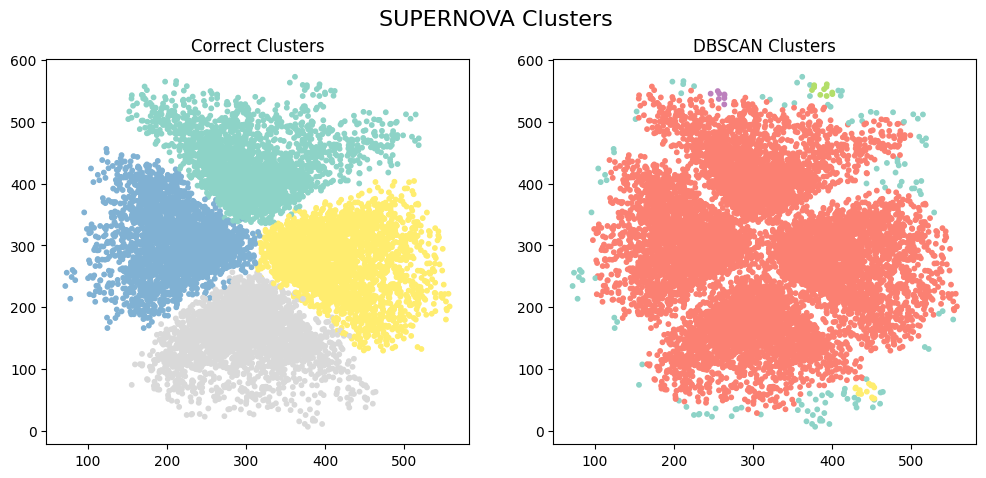

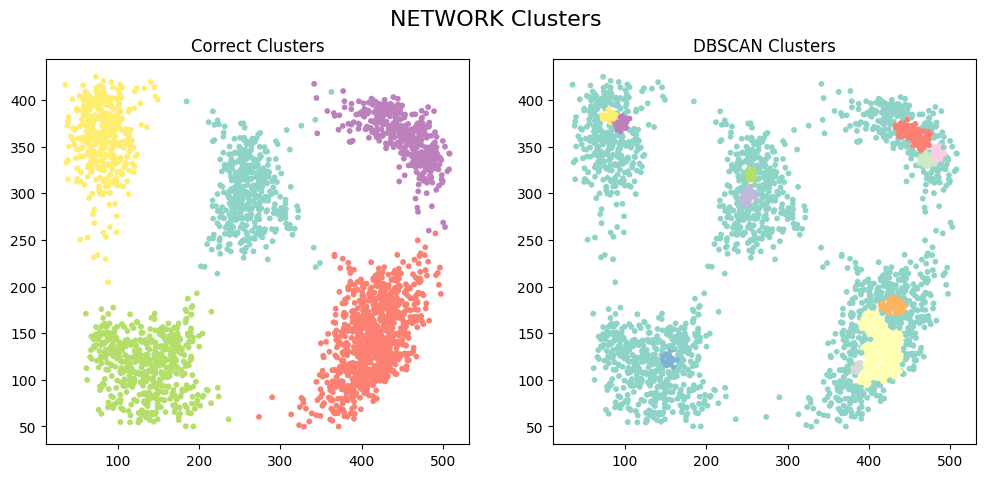

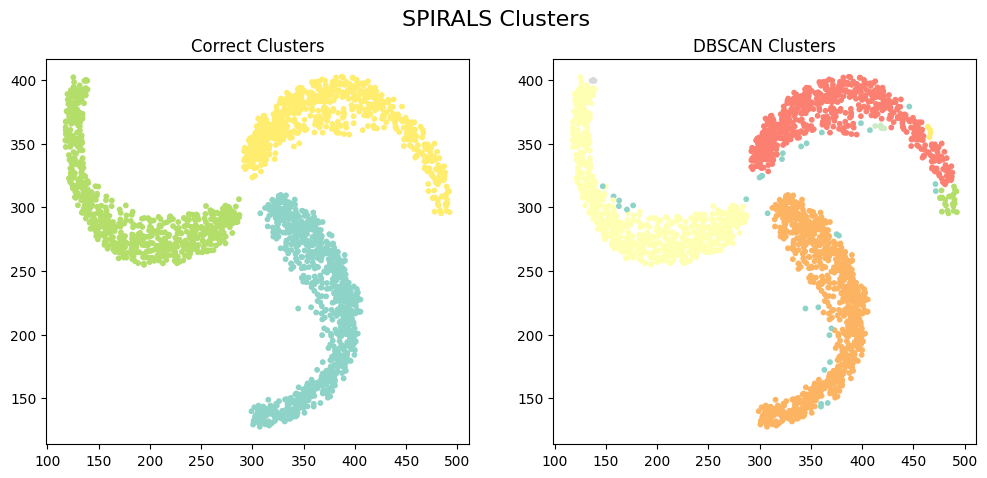

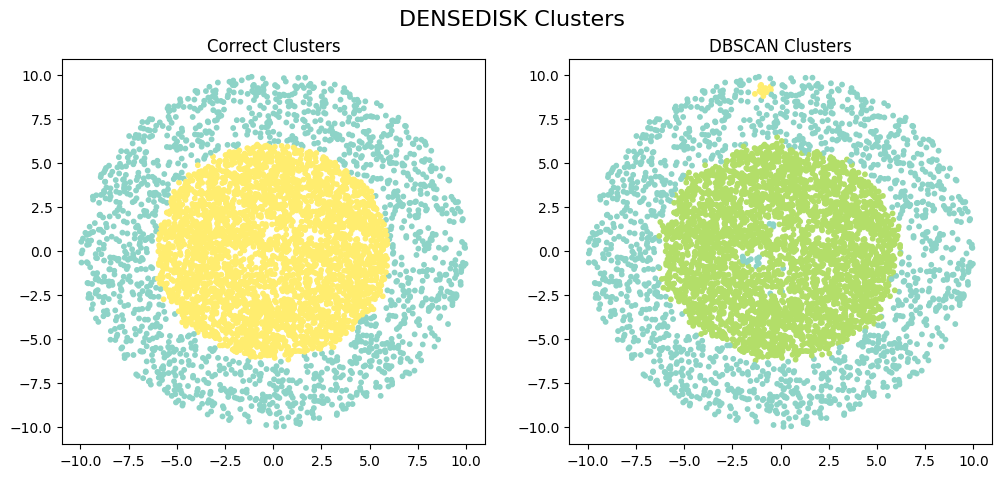

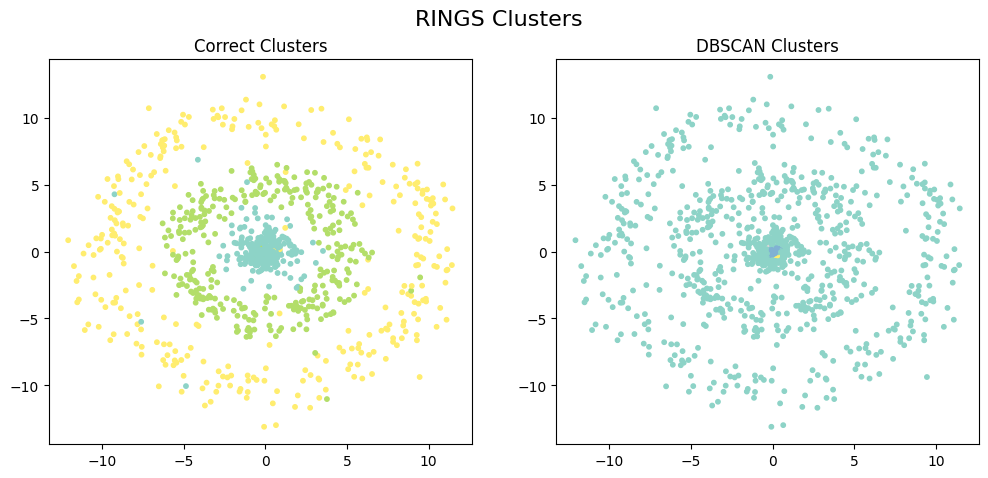

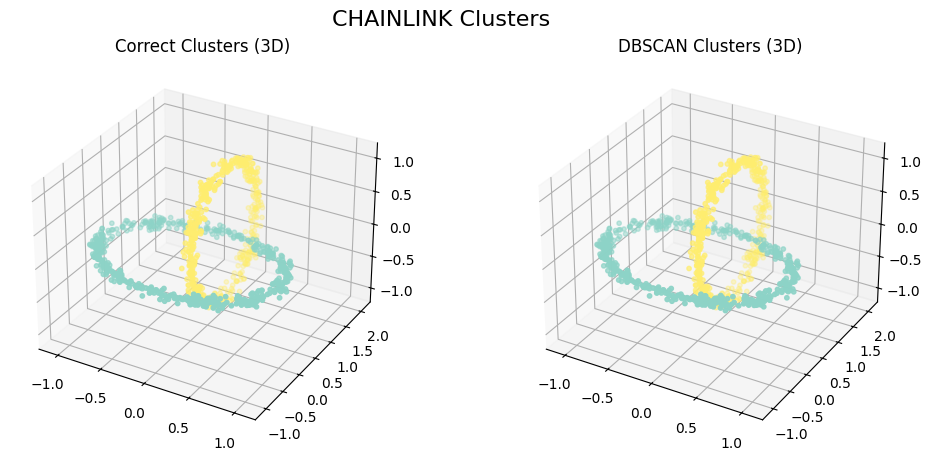

In [42]:
for dataset_name, df in datasets.items():
    original_df = eval(f"{dataset_name}_df")

    fig = plt.figure(figsize=(12, 5))
    fig.suptitle(f'{dataset_name.upper()} Clusters', size=16)

    if dataset_name == 'chainlink':
        ax = fig.add_subplot(121, projection='3d')
        ax.scatter(original_df['x'], original_df['y'], original_df['z'], c=original_df['color'], s=10, cmap='Set3')
        ax.set_title("Correct Clusters (3D)")

        ax = fig.add_subplot(122, projection='3d')
        ax.scatter(df['x'], df['y'], df['z'], c=df['Cluster'], s=10, cmap='Set3')
        ax.set_title("DBSCAN Clusters (3D)")

    else:
        axes = fig.subplots(1, 2)
        axes[0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap='Set3')
        axes[0].set_title("Correct Clusters")
        axes[1].scatter(df['x'], df['y'], c=df['Cluster'], s=10, cmap='Set3')
        axes[1].set_title("DBSCAN Clusters")

    plt.show()

## D. Compare all algorithms

1. Display the Correct cluster, K-means cluster, Agglomerative cluster and DBSCAN cluster in a single plot.

- Each row should contain each dataset
- Each column should contain each the correct cluster, k-means cluster, agglomerative cluster and DBSCAN cluster.

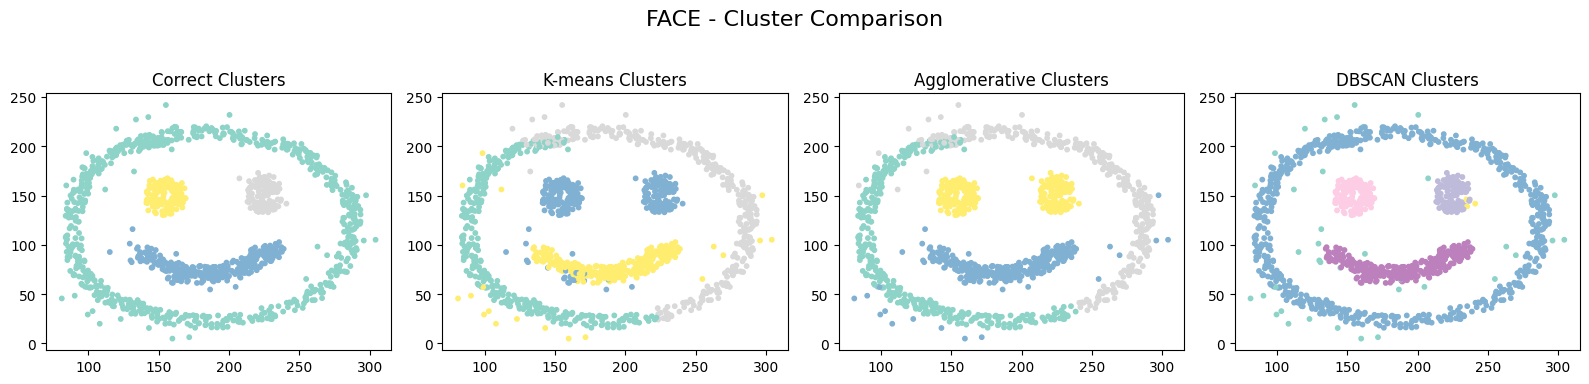

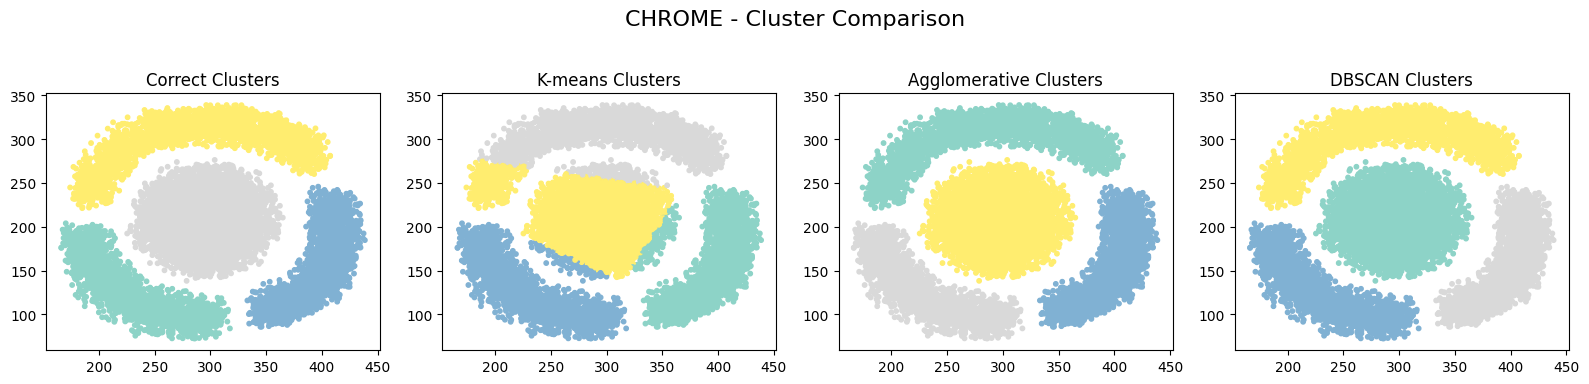

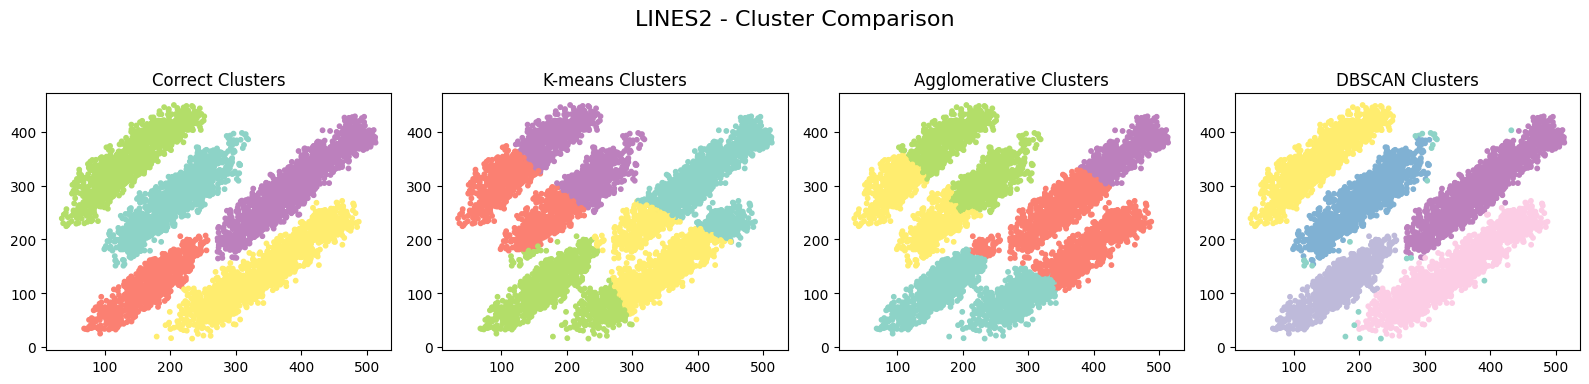

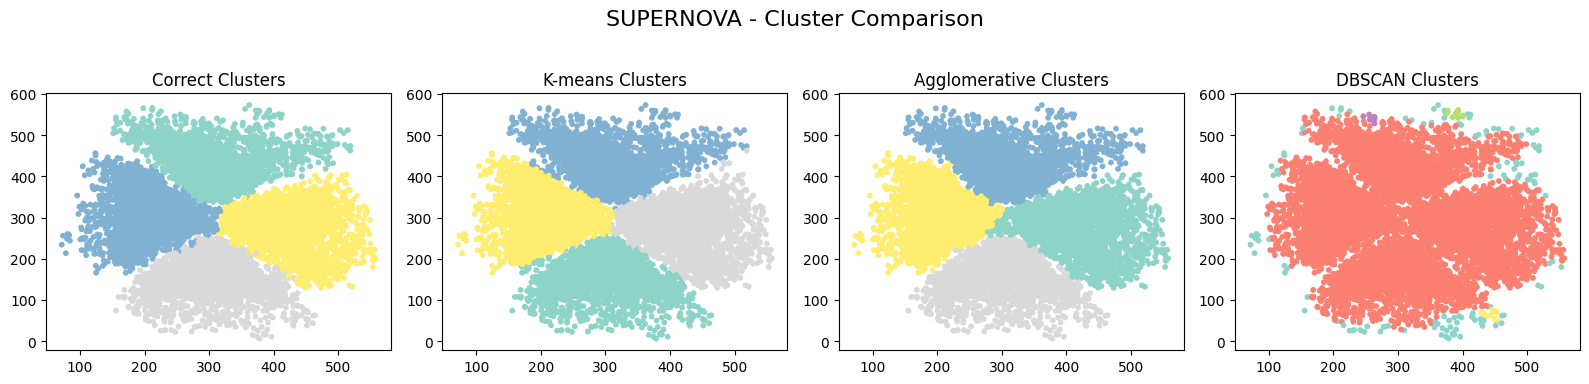

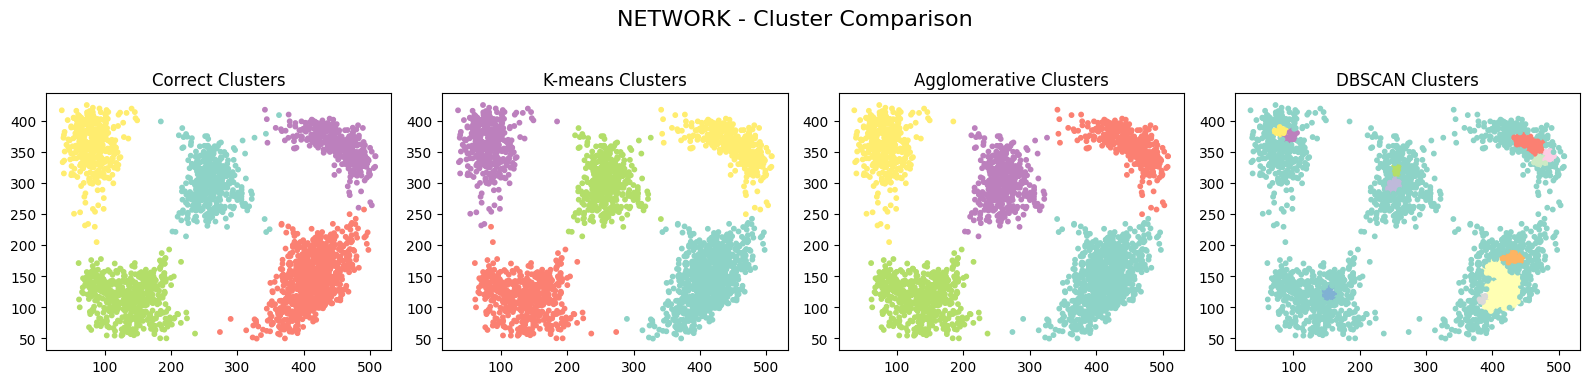

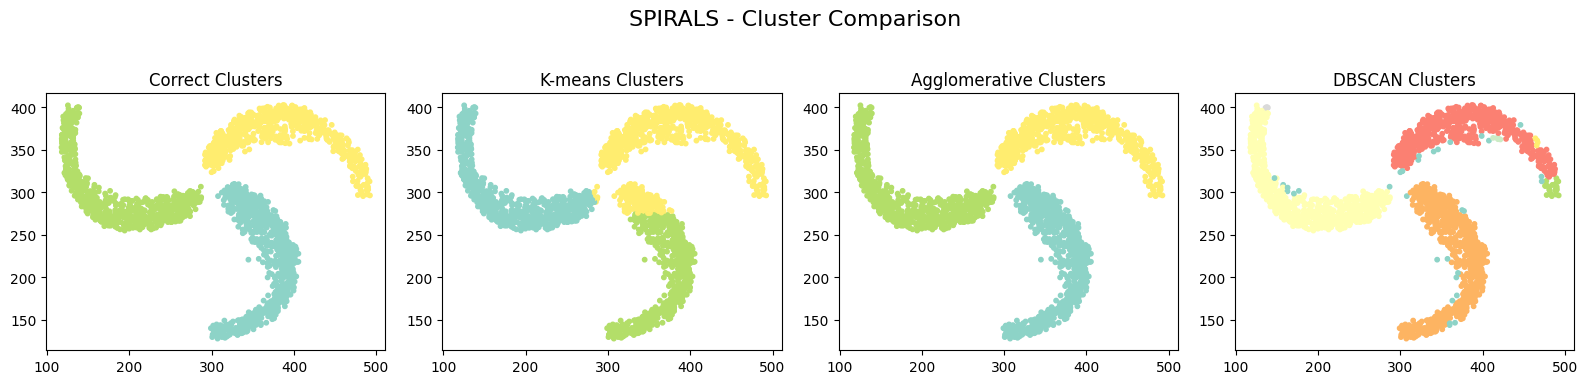

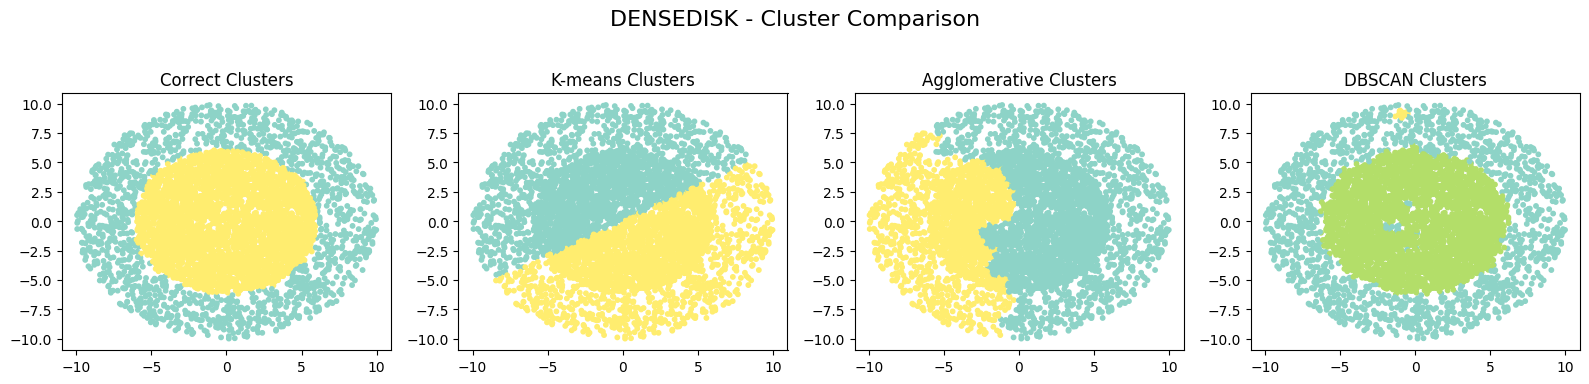

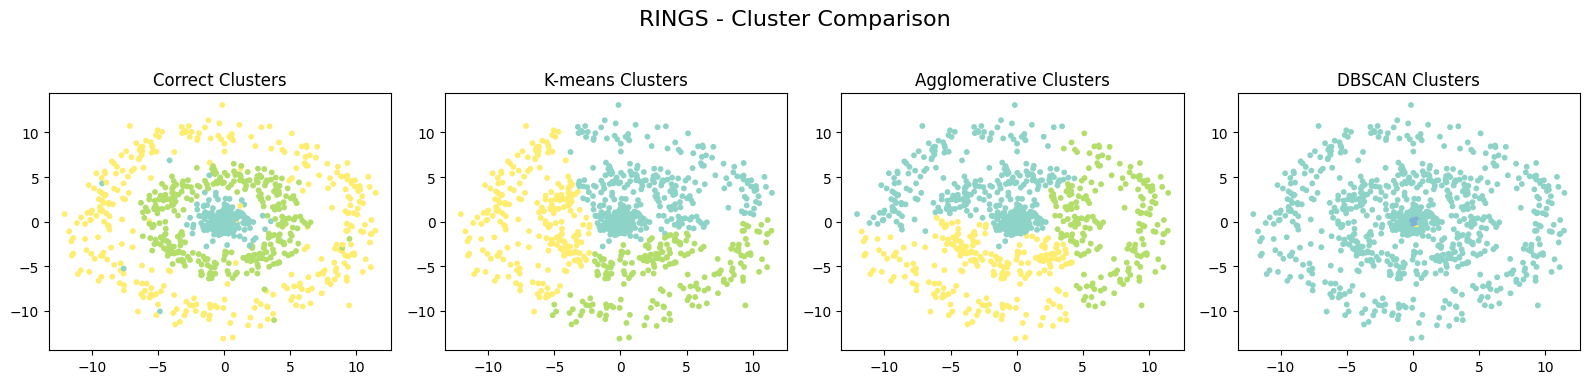

In [43]:
import matplotlib.pyplot as plt


datasets = ['face', 'chrome', 'lines2', 'supernova', 'network', 'spirals', 'densedisk', 'rings']

for dataset_name in datasets:
    fig, axes = plt.subplots(1, 4, figsize=(16, 4))  # 4 columns for 4 plots
    fig.suptitle(f'{dataset_name.upper()} - Cluster Comparison', fontsize=16)

    original_df = eval(f"{dataset_name}_df")
    kmeans_df = eval(f"{dataset_name}_kmeans_df")
    agg_df = eval(f"{dataset_name}_agg_df")
    dbscan_df = eval(f"{dataset_name}_dbscan_df")

    # Plot Correct Clusters
    axes[0].scatter(original_df['x'], original_df['y'], c=original_df['color'], s=10, cmap='Set3')
    axes[0].set_title("Correct Clusters")

    # Plot K-means Clusters
    axes[1].scatter(kmeans_df['x'], kmeans_df['y'], c=kmeans_df['Cluster'], s=10, cmap='Set3')
    axes[1].set_title("K-means Clusters")

    # Plot Agglomerative Clusters
    axes[2].scatter(agg_df['x'], agg_df['y'], c=agg_df['Cluster'], s=10, cmap='Set3')
    axes[2].set_title("Agglomerative Clusters")

    # Plot DBSCAN Clusters
    axes[3].scatter(dbscan_df['x'], dbscan_df['y'], c=dbscan_df['Cluster'], s=10, cmap='Set3')
    axes[3].set_title("DBSCAN Clusters")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


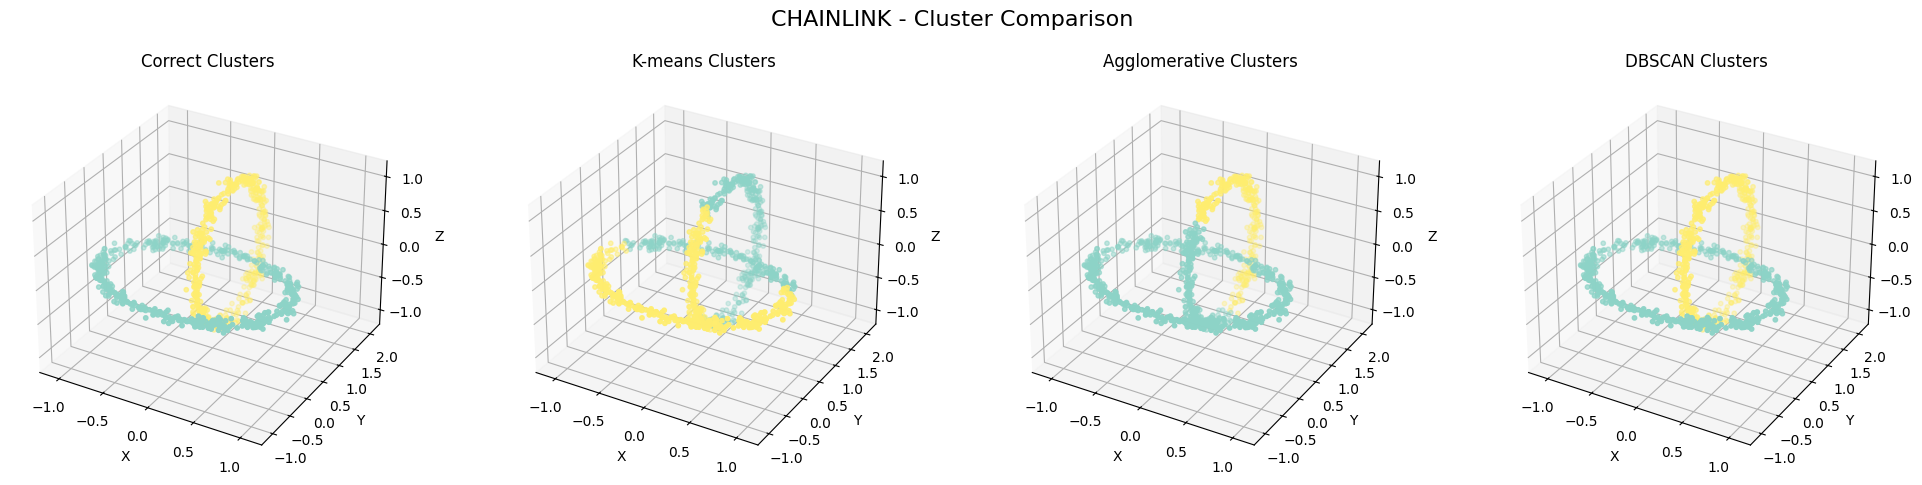

In [44]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


fig = plt.figure(figsize=(20, 5))
fig.suptitle('CHAINLINK - Cluster Comparison', fontsize=16)

# Correct Clusters
ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(chainlink_df['x'], chainlink_df['y'], chainlink_df['z'], c=chainlink_df['color'], s=10, cmap='Set3')
ax1.set_title("Correct Clusters")
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_zlabel('Z')

# K-means Clusters
ax2 = fig.add_subplot(142, projection='3d')
ax2.scatter(chainlink_kmeans_df['x'], chainlink_kmeans_df['y'], chainlink_kmeans_df['z'], c=chainlink_kmeans_df['Cluster'], s=10, cmap='Set3')
ax2.set_title("K-means Clusters")
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

# Agglomerative Clusters
ax3 = fig.add_subplot(143, projection='3d')
ax3.scatter(chainlink_agg_df['x'], chainlink_agg_df['y'], chainlink_agg_df['z'], c=chainlink_agg_df['Cluster'], s=10, cmap='Set3')
ax3.set_title("Agglomerative Clusters")
ax3.set_xlabel('X')
ax3.set_ylabel('Y')
ax3.set_zlabel('Z')

# DBSCAN Clusters
ax4 = fig.add_subplot(144, projection='3d')
ax4.scatter(chainlink_dbscan_df['x'], chainlink_dbscan_df['y'], chainlink_dbscan_df['z'], c=chainlink_dbscan_df['Cluster'], s=10, cmap='Set3')
ax4.set_title("DBSCAN Clusters")
ax4.set_xlabel('X')
ax4.set_ylabel('Y')
ax4.set_zlabel('Z')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()
